## 2020 12월 잠실 주요 5개 아파트 실거래가 예측하기!

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 1. Import Packages

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore')

plt.rc("font", family="Malgun Gothic")

### 2. Data Loading

In [ ]:
# 국토부에서 데이터 수집

apt = pd.read_excel('data/20.01-20.11.xlsx')
apt_ = pd.read_excel('data/20.12.xlsx')

In [ ]:
train = pd.concat([apt[apt['단지명']=='잠실엘스'], apt[apt['단지명']=='리센츠'], apt[apt['단지명']=='트리지움'],
                       apt[apt['단지명']=='레이크팰리스'], apt[apt['단지명']=='주공아파트 5단지']]).reset_index()

print(train.shape)
train.head(2)

(520, 16)


,index,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,해제사유발생일,거래유형,중개사소재지
0,2941,서울특별시 송파구 잠실동,19,19,0,잠실엘스,84.88,202002,7,"192,000",18,2008,올림픽로 99,NaN,-,-
1,2942,서울특별시 송파구 잠실동,19,19,0,잠실엘스,84.97,202002,7,"189,000",19,2008,올림픽로 99,NaN,-,-


In [ ]:
test = pd.concat([apt_[apt_['단지명']=='잠실엘스'], apt_[apt_['단지명']=='리센츠'], apt_[apt_['단지명']=='트리지움'],
                       apt_[apt_['단지명']=='레이크팰리스'], apt_[apt_['단지명']=='주공아파트 5단지']]).reset_index()

print(test.shape)
test.head(2)

(58, 16)


,index,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,해제사유발생일,거래유형,중개사소재지
0,376,서울특별시 송파구 잠실동,19,19,0,잠실엘스,119.93,202012,3,"270,000",6,2008,올림픽로 99,NaN,-,-
1,377,서울특별시 송파구 잠실동,19,19,0,잠실엘스,59.96,202012,5,"185,000",11,2008,올림픽로 99,NaN,-,-


In [ ]:
# 공공데이터포털에서 데이터 수집

edu = pd.read_excel("data/education.xlsx")

print(edu.shape)
edu.head(2)

(140, 6)


,설립,학교명,전화번호,주소,홈페이지,데이터기준일자
0,공립,서울가락초등학교병설유치원,02-3402-1154,"서울특별시 송파구 송파대로37길 45, 서울가락초등학교 (가락동)",http://www.seoulgarak.es.kr/index.do,2020-06-10
1,공립,서울거여초등학교병설유치원,02-2160-5490,"서울특별시 송파구 마천로25길 18, 서울거여초등학교 (오금동)",http://www.geoyeo.kg.kr/,2020-06-10


### 3. Preprocessing

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     520 non-null    int64  
 1   시군구       520 non-null    object 
 2   번지        520 non-null    object 
 3   본번        520 non-null    int64  
 4   부번        520 non-null    int64  
 5   단지명       520 non-null    object 
 6   전용면적(㎡)   520 non-null    float64
 7   계약년월      520 non-null    int64  
 8   계약일       520 non-null    int64  
 9   거래금액(만원)  520 non-null    object 
 10  층         520 non-null    int64  
 11  건축년도      520 non-null    int64  
 12  도로명       520 non-null    object 
 13  해제사유발생일   23 non-null     float64
 14  거래유형      520 non-null    object 
 15  중개사소재지    520 non-null    object 
dtypes: float64(2), int64(7), object(7)
memory usage: 65.1+ KB


#### 3-1-1) 거래금액(만원) int로 바꾸기

In [ ]:
train["거래금액(만원)"] = train["거래금액(만원)"].str.replace(",", "").astype("int64")
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     520 non-null    int64  
 1   시군구       520 non-null    object 
 2   번지        520 non-null    object 
 3   본번        520 non-null    int64  
 4   부번        520 non-null    int64  
 5   단지명       520 non-null    object 
 6   전용면적(㎡)   520 non-null    float64
 7   계약년월      520 non-null    int64  
 8   계약일       520 non-null    int64  
 9   거래금액(만원)  520 non-null    int64  
 10  층         520 non-null    int64  
 11  건축년도      520 non-null    int64  
 12  도로명       520 non-null    object 
 13  해제사유발생일   23 non-null     float64
 14  거래유형      520 non-null    object 
 15  중개사소재지    520 non-null    object 
dtypes: float64(2), int64(8), object(6)
memory usage: 65.1+ KB


In [ ]:
test["거래금액(만원)"] = test["거래금액(만원)"].str.replace(",", "").astype("int64")
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     58 non-null     int64  
 1   시군구       58 non-null     object 
 2   번지        58 non-null     object 
 3   본번        58 non-null     int64  
 4   부번        58 non-null     int64  
 5   단지명       58 non-null     object 
 6   전용면적(㎡)   58 non-null     float64
 7   계약년월      58 non-null     int64  
 8   계약일       58 non-null     int64  
 9   거래금액(만원)  58 non-null     int64  
 10  층         58 non-null     int64  
 11  건축년도      58 non-null     int64  
 12  도로명       58 non-null     object 
 13  해제사유발생일   1 non-null      float64
 14  거래유형      58 non-null     object 
 15  중개사소재지    58 non-null     object 
dtypes: float64(2), int64(8), object(6)
memory usage: 7.4+ KB


#### 3-1-2) 단지명(encoding)

In [ ]:
train["단지명"].unique()

array(['잠실엘스', '리센츠', '트리지움', '레이크팰리스', '주공아파트 5단지'], dtype=object)

In [ ]:
cnt = 0
for u in train["단지명"].unique():
    cnt += 1
    print(cnt, u)

1 잠실엘스
2 리센츠
3 트리지움
4 레이크팰리스
5 주공아파트 5단지


In [ ]:
for i, u in enumerate(train["단지명"].unique()):
    train.loc[train["단지명"] == u, '단지명(Encode)'] = i+1

train.head(2)

,index,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,해제사유발생일,거래유형,중개사소재지,단지명(Encode)
0,2941,서울특별시 송파구 잠실동,19,19,0,잠실엘스,84.88,202002,7,192000,18,2008,올림픽로 99,NaN,-,-,1.0
1,2942,서울특별시 송파구 잠실동,19,19,0,잠실엘스,84.97,202002,7,189000,19,2008,올림픽로 99,NaN,-,-,1.0


In [ ]:
train['단지명(Encode)'].unique()

array([1., 2., 3., 4., 5.])

In [ ]:
for i, u in enumerate(test["단지명"].unique()):
    test.loc[test["단지명"] == u, '단지명(Encode)'] = i+1

test.head(2)

,index,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,해제사유발생일,거래유형,중개사소재지,단지명(Encode)
0,376,서울특별시 송파구 잠실동,19,19,0,잠실엘스,119.93,202012,3,270000,6,2008,올림픽로 99,NaN,-,-,1.0
1,377,서울특별시 송파구 잠실동,19,19,0,잠실엘스,59.96,202012,5,185000,11,2008,올림픽로 99,NaN,-,-,1.0


#### 3-2) education

In [ ]:
edu_js = (edu[edu["주소"].str.contains("잠실엘스|리센츠|트리지움|레이크팰리스|주공아파트 5단지")])
edu_js.reset_index(drop=True, inplace=True)
print(edu_js.shape)
edu_js

(16, 6)


,설립,학교명,전화번호,주소,홈페이지,데이터기준일자
0,공립,서울송전초등학교병설유치원,02-420-6343,"서울특별시 송파구 석촌호수로 159, 서울송전초등학교 (잠실동, 레이크팰리스)",http://songjeon.kg.kr/,2020-06-10
1,공립,서울신천초등학교병설유치원,02-412-5488,"서울특별시 송파구 올림픽로 215 (잠실동,주공아파트 5단지)",http://www.서울신천병설유치원.com,2020-06-10
2,공립,서울잠신초등학교병설유치원,02-418-9559,"서울특별시 송파구 잠실로 32, 서울잠신초등학교 (잠실동, 리센츠)",http://www.jamshin.es.kr/53043/subMenu.do,2020-06-10
3,공립,서울잠일초등학교병설유치원,02-413-2856,"서울특별시 송파구 올림픽로 95 ,서울잠일초등학교 (잠실동, 잠실엘스)",http://jamil.es.kr/129715/subMenu.do,2020-06-10
4,사립,잠실럭키유치원,02-424-5665,"서울특별시 송파구 올림픽로 135 , 250동 앞 (잠실동, 리센츠)",http://jluckids.org/main/,2020-06-10
5,사립,잠실밀알유치원,02-3431-2004,"서울특별시 송파구 석촌호수로 103 (잠실동, 트리지움)",NaN,2020-06-10
6,공립,서울버들초등학교,02-2203-6412,"서울특별시 송파구 석촌호수로 81 (잠실동, 트리지움)",http://www.seoulbeodle.es.kr/,2020-06-10
7,공립,서울송전초등학교,02-420-6565,"서울특별시 송파구 석촌호수로 159 (잠실동, 레이크팰리스)",http://ssj.es.kr,2020-06-10
8,공립,서울신천초등학교,02-422-0289,"서울특별시 송파구 올림픽로 215 , 서울신천초등학교 (잠실동, 주공아파트 5단지)",http://www.sh.es.kr,2020-06-10
9,공립,서울잠신초등학교,02-412-3286,"서울특별시 송파구 잠실로 32 (잠실동, 리센츠)",http://www.jamshin.es.kr,2020-06-10


In [ ]:
edu_js['주소'][0].replace("(", "").replace(")", "").split(' ')[-1]

'레이크팰리스'

In [ ]:
for i in range(0, len(edu_js)):
    if '5단지' in edu_js['주소'][i]:
        edu_js.loc[i,'단지명'] = '주공아파트 5단지'
    else:
        edu_js.loc[i,'단지명'] = edu_js['주소'][i].replace("(", "").replace(")", "").split(" ")[-1]
edu_js.head(2)

,설립,학교명,전화번호,주소,홈페이지,데이터기준일자,단지명
0,공립,서울송전초등학교병설유치원,02-420-6343,"서울특별시 송파구 석촌호수로 159, 서울송전초등학교 (잠실동, 레이크팰리스)",http://songjeon.kg.kr/,2020-06-10,레이크팰리스
1,공립,서울신천초등학교병설유치원,02-412-5488,"서울특별시 송파구 올림픽로 215 (잠실동,주공아파트 5단지)",http://www.서울신천병설유치원.com,2020-06-10,주공아파트 5단지


In [ ]:
edu_js['단지명'].value_counts()

리센츠          5
잠실엘스         4
트리지움         3
레이크팰리스       2
주공아파트 5단지    2
Name: 단지명, dtype: int64

In [ ]:
train.loc[train['단지명'] == '리센츠', '교육'] = 5
train.loc[train['단지명'] == '잠실엘스', '교육'] = 4
train.loc[train['단지명'] == '트리지움', '교육'] = 3
train.loc[train['단지명'] == '레이크팰리스', '교육'] = 2
train.loc[train['단지명'] == '주공아파트 5단지', '교육'] = 2

#train['교육'].value_counts() , train['단지명'].value_counts()

In [ ]:
test.loc[test['단지명'] == '리센츠', '교육'] = 5
test.loc[test['단지명'] == '잠실엘스', '교육'] = 4
test.loc[test['단지명'] == '트리지움', '교육'] = 3
test.loc[test['단지명'] == '레이크팰리스', '교육'] = 2
test.loc[test['단지명'] == '주공아파트 5단지', '교육'] = 2

#test['교육'].value_counts() , test['단지명'].value_counts()

In [ ]:
for i in range(0, len(edu_js)):
    if '유치원' in edu_js['학교명'][i]:
        edu_js.loc[i,'학교명(Encode)'] = '유치원'
        
    elif '초등학교' in edu_js['학교명'][i]:
        edu_js.loc[i,'학교명(Encode)'] = '초등학교'
        
    elif '중학교' in edu_js['학교명'][i]:
        edu_js.loc[i,'학교명(Encode)'] = '중학교'
        
    elif '고등학교' in edu_js['학교명'][i]:
        edu_js.loc[i,'학교명(Encode)'] = '고등학교'

edu_js

,설립,학교명,전화번호,주소,홈페이지,데이터기준일자,단지명,학교명(Encode)
0,공립,서울송전초등학교병설유치원,02-420-6343,"서울특별시 송파구 석촌호수로 159, 서울송전초등학교 (잠실동, 레이크팰리스)",http://songjeon.kg.kr/,2020-06-10,레이크팰리스,유치원
1,공립,서울신천초등학교병설유치원,02-412-5488,"서울특별시 송파구 올림픽로 215 (잠실동,주공아파트 5단지)",http://www.서울신천병설유치원.com,2020-06-10,주공아파트 5단지,유치원
2,공립,서울잠신초등학교병설유치원,02-418-9559,"서울특별시 송파구 잠실로 32, 서울잠신초등학교 (잠실동, 리센츠)",http://www.jamshin.es.kr/53043/subMenu.do,2020-06-10,리센츠,유치원
3,공립,서울잠일초등학교병설유치원,02-413-2856,"서울특별시 송파구 올림픽로 95 ,서울잠일초등학교 (잠실동, 잠실엘스)",http://jamil.es.kr/129715/subMenu.do,2020-06-10,잠실엘스,유치원
4,사립,잠실럭키유치원,02-424-5665,"서울특별시 송파구 올림픽로 135 , 250동 앞 (잠실동, 리센츠)",http://jluckids.org/main/,2020-06-10,리센츠,유치원
5,사립,잠실밀알유치원,02-3431-2004,"서울특별시 송파구 석촌호수로 103 (잠실동, 트리지움)",NaN,2020-06-10,트리지움,유치원
6,공립,서울버들초등학교,02-2203-6412,"서울특별시 송파구 석촌호수로 81 (잠실동, 트리지움)",http://www.seoulbeodle.es.kr/,2020-06-10,트리지움,초등학교
7,공립,서울송전초등학교,02-420-6565,"서울특별시 송파구 석촌호수로 159 (잠실동, 레이크팰리스)",http://ssj.es.kr,2020-06-10,레이크팰리스,초등학교
8,공립,서울신천초등학교,02-422-0289,"서울특별시 송파구 올림픽로 215 , 서울신천초등학교 (잠실동, 주공아파트 5단지)",http://www.sh.es.kr,2020-06-10,주공아파트 5단지,초등학교
9,공립,서울잠신초등학교,02-412-3286,"서울특별시 송파구 잠실로 32 (잠실동, 리센츠)",http://www.jamshin.es.kr,2020-06-10,리센츠,초등학교


In [ ]:
edu_js_dum = pd.get_dummies(edu_js['학교명(Encode)'])
edu_js = pd.concat([edu_js, edu_js_dum], axis=1)
edu_js

,설립,학교명,전화번호,주소,홈페이지,데이터기준일자,단지명,학교명(Encode),고등학교,유치원,중학교,초등학교
0,공립,서울송전초등학교병설유치원,02-420-6343,"서울특별시 송파구 석촌호수로 159, 서울송전초등학교 (잠실동, 레이크팰리스)",http://songjeon.kg.kr/,2020-06-10,레이크팰리스,유치원,0,1,0,0
1,공립,서울신천초등학교병설유치원,02-412-5488,"서울특별시 송파구 올림픽로 215 (잠실동,주공아파트 5단지)",http://www.서울신천병설유치원.com,2020-06-10,주공아파트 5단지,유치원,0,1,0,0
2,공립,서울잠신초등학교병설유치원,02-418-9559,"서울특별시 송파구 잠실로 32, 서울잠신초등학교 (잠실동, 리센츠)",http://www.jamshin.es.kr/53043/subMenu.do,2020-06-10,리센츠,유치원,0,1,0,0
3,공립,서울잠일초등학교병설유치원,02-413-2856,"서울특별시 송파구 올림픽로 95 ,서울잠일초등학교 (잠실동, 잠실엘스)",http://jamil.es.kr/129715/subMenu.do,2020-06-10,잠실엘스,유치원,0,1,0,0
4,사립,잠실럭키유치원,02-424-5665,"서울특별시 송파구 올림픽로 135 , 250동 앞 (잠실동, 리센츠)",http://jluckids.org/main/,2020-06-10,리센츠,유치원,0,1,0,0
5,사립,잠실밀알유치원,02-3431-2004,"서울특별시 송파구 석촌호수로 103 (잠실동, 트리지움)",NaN,2020-06-10,트리지움,유치원,0,1,0,0
6,공립,서울버들초등학교,02-2203-6412,"서울특별시 송파구 석촌호수로 81 (잠실동, 트리지움)",http://www.seoulbeodle.es.kr/,2020-06-10,트리지움,초등학교,0,0,0,1
7,공립,서울송전초등학교,02-420-6565,"서울특별시 송파구 석촌호수로 159 (잠실동, 레이크팰리스)",http://ssj.es.kr,2020-06-10,레이크팰리스,초등학교,0,0,0,1
8,공립,서울신천초등학교,02-422-0289,"서울특별시 송파구 올림픽로 215 , 서울신천초등학교 (잠실동, 주공아파트 5단지)",http://www.sh.es.kr,2020-06-10,주공아파트 5단지,초등학교,0,0,0,1
9,공립,서울잠신초등학교,02-412-3286,"서울특별시 송파구 잠실로 32 (잠실동, 리센츠)",http://www.jamshin.es.kr,2020-06-10,리센츠,초등학교,0,0,0,1


In [ ]:
edu_js_sum = edu_js.groupby('단지명').sum()
edu_js_sum = edu_js_sum.reset_index().rename(columns={'고등학교':'고등학교_sum', '유치원':'유치원_sum',
                                         '중학교':'중학교_sum', '초등학교':'초등학교_sum'})
edu_js_sum

,단지명,고등학교_sum,유치원_sum,중학교_sum,초등학교_sum
0,레이크팰리스,0,1,0,1
1,리센츠,1,2,1,1
2,잠실엘스,1,1,1,1
3,주공아파트 5단지,0,1,0,1
4,트리지움,1,1,0,1


In [ ]:
pd.merge(edu_js, edu_js_sum, how='left', left_on='단지명', right_on='단지명').head(2)

,설립,학교명,전화번호,주소,홈페이지,데이터기준일자,단지명,학교명(Encode),고등학교,유치원,중학교,초등학교,고등학교_sum,유치원_sum,중학교_sum,초등학교_sum
0,공립,서울송전초등학교병설유치원,02-420-6343,"서울특별시 송파구 석촌호수로 159, 서울송전초등학교 (잠실동, 레이크팰리스)",http://songjeon.kg.kr/,2020-06-10,레이크팰리스,유치원,0,1,0,0,0,1,0,1
1,공립,서울신천초등학교병설유치원,02-412-5488,"서울특별시 송파구 올림픽로 215 (잠실동,주공아파트 5단지)",http://www.서울신천병설유치원.com,2020-06-10,주공아파트 5단지,유치원,0,1,0,0,0,1,0,1


In [ ]:
train = pd.merge(train, edu_js_sum, how='left', left_on='단지명', right_on='단지명')
train.head(3)

,index,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),...,도로명,해제사유발생일,거래유형,중개사소재지,단지명(Encode),교육,고등학교_sum,유치원_sum,중학교_sum,초등학교_sum
0,2941,서울특별시 송파구 잠실동,19,19,0,잠실엘스,84.88,202002,7,192000,...,올림픽로 99,NaN,-,-,1.0,4.0,1,1,1,1
1,2942,서울특별시 송파구 잠실동,19,19,0,잠실엘스,84.97,202002,7,189000,...,올림픽로 99,NaN,-,-,1.0,4.0,1,1,1,1
2,2943,서울특별시 송파구 잠실동,19,19,0,잠실엘스,84.80,202002,10,185000,...,올림픽로 99,NaN,-,-,1.0,4.0,1,1,1,1


In [ ]:
test = pd.merge(test, edu_js_sum, how='left', left_on='단지명', right_on='단지명')
test.head(3)

,index,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),...,도로명,해제사유발생일,거래유형,중개사소재지,단지명(Encode),교육,고등학교_sum,유치원_sum,중학교_sum,초등학교_sum
0,376,서울특별시 송파구 잠실동,19,19,0,잠실엘스,119.93,202012,3,270000,...,올림픽로 99,NaN,-,-,1.0,4.0,1,1,1,1
1,377,서울특별시 송파구 잠실동,19,19,0,잠실엘스,59.96,202012,5,185000,...,올림픽로 99,NaN,-,-,1.0,4.0,1,1,1,1
2,378,서울특별시 송파구 잠실동,19,19,0,잠실엘스,84.80,202012,5,220000,...,올림픽로 99,NaN,-,-,1.0,4.0,1,1,1,1


#### 3-3) 아산병원과 거리(by car)

In [ ]:
train.loc[train['단지명'] == '잠실엘스', '종합병원(거리)'] = 4.5
train.loc[train['단지명'] == '리센츠', '종합병원(거리)'] = 3.9
train.loc[train['단지명'] == '트리지움', '종합병원(거리)'] = 3.9
train.loc[train['단지명'] == '레이크팰리스', '종합병원(거리)'] = 3.6
train.loc[train['단지명'] == '주공아파트 5단지', '종합병원(거리)'] = 3.1

In [ ]:
test.loc[test['단지명'] == '잠실엘스', '종합병원(거리)'] = 4.5
test.loc[test['단지명'] == '리센츠', '종합병원(거리)'] = 3.9
test.loc[test['단지명'] == '트리지움', '종합병원(거리)'] = 3.9
test.loc[test['단지명'] == '레이크팰리스', '종합병원(거리)'] = 3.6
test.loc[test['단지명'] == '주공아파트 5단지', '종합병원(거리)'] = 3.1

#### 3-4) 석촌호수와의 거리(by walk)

In [ ]:
train.loc[train['단지명'] == '잠실엘스', '석촌호수(거리)'] = 2.2
train.loc[train['단지명'] == '리센츠', '석촌호수(거리)'] = 1.2
train.loc[train['단지명'] == '트리지움', '석촌호수(거리)'] = 0.811
train.loc[train['단지명'] == '레이크팰리스', '석촌호수(거리)'] = 0.383
train.loc[train['단지명'] == '주공아파트 5단지', '석촌호수(거리)'] = 1.3

In [ ]:
test.loc[test['단지명'] == '잠실엘스', '석촌호수(거리)'] = 2.2
test.loc[test['단지명'] == '리센츠', '석촌호수(거리)'] = 1.2
test.loc[test['단지명'] == '트리지움', '석촌호수(거리)'] = 0.811
test.loc[test['단지명'] == '레이크팰리스', '석촌호수(거리)'] = 0.383
test.loc[test['단지명'] == '주공아파트 5단지', '석촌호수(거리)'] = 1.3

#### 3-5) 한강과의 거리(by walk)

In [ ]:
train.loc[train['단지명'] == '잠실엘스', '한강(거리)'] = 0.750
train.loc[train['단지명'] == '리센츠', '한강(거리)'] = 0.706
train.loc[train['단지명'] == '트리지움', '한강(거리)'] = 1.3
train.loc[train['단지명'] == '레이크팰리스', '한강(거리)'] = 1.3
train.loc[train['단지명'] == '주공아파트 5단지', '한강(거리)'] = 0.768

In [ ]:
test.loc[test['단지명'] == '잠실엘스', '한강(거리)'] = 0.750
test.loc[test['단지명'] == '리센츠', '한강(거리)'] = 0.706
test.loc[test['단지명'] == '트리지움', '한강(거리)'] = 1.3
test.loc[test['단지명'] == '레이크팰리스', '한강(거리)'] = 1.3
test.loc[test['단지명'] == '주공아파트 5단지', '한강(거리)'] = 0.768

#### 3-6-1) 롯데와의 거리(by walk) 

In [ ]:
train.loc[train['단지명'] == '잠실엘스', '롯데(걷기_거리)'] = 1.8
train.loc[train['단지명'] == '리센츠', '롯데(걷기_거리)'] = 1.3
train.loc[train['단지명'] == '트리지움', '롯데(걷기_거리)'] = 1.4
train.loc[train['단지명'] == '레이크팰리스', '롯데(걷기_거리)'] = 0.903
train.loc[train['단지명'] == '주공아파트 5단지', '롯데(걷기_거리)'] = 0.919

In [ ]:
test.loc[test['단지명'] == '잠실엘스', '롯데(걷기_거리)'] = 1.8
test.loc[test['단지명'] == '리센츠', '롯데(걷기_거리)'] = 1.3
test.loc[test['단지명'] == '트리지움', '롯데(걷기_거리)'] = 1.4
test.loc[test['단지명'] == '레이크팰리스', '롯데(걷기_거리)'] = 0.903
test.loc[test['단지명'] == '주공아파트 5단지', '롯데(걷기_거리)'] = 0.919

#### 3-6-2) 롯데와의 거리(by car)

In [ ]:
train.loc[train['단지명'] == '잠실엘스', '롯데(차_거리)'] = 3.4
train.loc[train['단지명'] == '리센츠', '롯데(차_거리)'] = 1.6
train.loc[train['단지명'] == '트리지움', '롯데(차_거리)'] = 1.9
train.loc[train['단지명'] == '레이크팰리스', '롯데(차_거리)'] = 0.896
train.loc[train['단지명'] == '주공아파트 5단지', '롯데(차_거리)'] = 1.4

In [ ]:
test.loc[test['단지명'] == '잠실엘스', '롯데(차_거리)'] = 3.4
test.loc[test['단지명'] == '리센츠', '롯데(차_거리)'] = 1.6
test.loc[test['단지명'] == '트리지움', '롯데(차_거리)'] = 1.9
test.loc[test['단지명'] == '레이크팰리스', '롯데(차_거리)'] = 0.896
test.loc[test['단지명'] == '주공아파트 5단지', '롯데(차_거리)'] = 1.4

#### 3-8-1) 송파경찰서와의 거리(by car)

In [ ]:
train.loc[train['단지명'] == '잠실엘스', '경찰서(거리)'] = 5.3
train.loc[train['단지명'] == '리센츠', '경찰서(거리)'] = 4.1
train.loc[train['단지명'] == '트리지움', '경찰서(거리)'] = 4.2
train.loc[train['단지명'] == '레이크팰리스', '경찰서(거리)'] = 3.3
train.loc[train['단지명'] == '주공아파트 5단지', '경찰서(거리)'] = 3.9

In [ ]:
test.loc[test['단지명'] == '잠실엘스', '경찰서(거리)'] = 5.3
test.loc[test['단지명'] == '리센츠', '경찰서(거리)'] = 4.1
test.loc[test['단지명'] == '트리지움', '경찰서(거리)'] = 4.2
test.loc[test['단지명'] == '레이크팰리스', '경찰서(거리)'] = 3.3
test.loc[test['단지명'] == '주공아파트 5단지', '경찰서(거리)'] = 3.9

#### 3-8-2) 단지 내 치안센터 여부

In [ ]:
train.loc[train['단지명'] == '잠실엘스', '치안센터'] = 1
train.loc[train['단지명'] == '리센츠', '치안센터'] = 0
train.loc[train['단지명'] == '트리지움', '치안센터'] = 0
train.loc[train['단지명'] == '레이크팰리스', '치안센터'] = 0
train.loc[train['단지명'] == '주공아파트 5단지', '치안센터'] = 1

In [ ]:
test.loc[test['단지명'] == '잠실엘스', '치안센터'] = 1
test.loc[test['단지명'] == '리센츠', '치안센터'] = 0
test.loc[test['단지명'] == '트리지움', '치안센터'] = 0
test.loc[test['단지명'] == '레이크팰리스', '치안센터'] = 0
test.loc[test['단지명'] == '주공아파트 5단지', '치안센터'] = 1

#### 3-7) 단지 내 주민센터 여부

In [ ]:
train.loc[train['단지명'] == '잠실엘스', '주민센터'] = 0
train.loc[train['단지명'] == '리센츠', '주민센터'] = 1
train.loc[train['단지명'] == '트리지움', '주민센터'] = 0
train.loc[train['단지명'] == '레이크팰리스', '주민센터'] = 0
train.loc[train['단지명'] == '주공아파트 5단지', '주민센터'] = 1

In [ ]:
test.loc[test['단지명'] == '잠실엘스', '주민센터'] = 0
test.loc[test['단지명'] == '리센츠', '주민센터'] = 1
test.loc[test['단지명'] == '트리지움', '주민센터'] = 0
test.loc[test['단지명'] == '레이크팰리스', '주민센터'] = 0
test.loc[test['단지명'] == '주공아파트 5단지', '주민센터'] = 1

#### 3-9) 지하철역과의 거리

In [ ]:
train.loc[train['단지명'] == '잠실엘스', '지하철(거리)'] = 0.52
train.loc[train['단지명'] == '리센츠', '지하철(거리)'] = 0.212
train.loc[train['단지명'] == '트리지움', '지하철(거리)'] = 0.393
train.loc[train['단지명'] == '레이크팰리스', '지하철(거리)'] = 0.72
train.loc[train['단지명'] == '주공아파트 5단지', '지하철(거리)'] = 0.819

In [ ]:
test.loc[test['단지명'] == '잠실엘스', '지하철(거리)'] = 0.52
test.loc[test['단지명'] == '리센츠', '지하철(거리)'] = 0.212
test.loc[test['단지명'] == '트리지움', '지하철(거리)'] = 0.393
test.loc[test['단지명'] == '레이크팰리스', '지하철(거리)'] = 0.72
test.loc[test['단지명'] == '주공아파트 5단지', '지하철(거리)'] = 0.819

#### 3-10-1) 평 단위로 변환( / 3.3)

In [ ]:
train['전용면적(Encode)'] = round(train['전용면적(㎡)']/3.3)
train.head(1)

,index,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),...,종합병원(거리),석촌호수(거리),한강(거리),롯데(걷기_거리),롯데(차_거리),경찰서(거리),치안센터,주민센터,지하철(거리),전용면적(Encode)
0,2941,서울특별시 송파구 잠실동,19,19,0,잠실엘스,84.88,202002,7,192000,...,4.5,2.2,0.75,1.8,3.4,5.3,1.0,0.0,0.52,26.0


In [ ]:
train['전용면적(Encode)'].value_counts()

26.0    251
18.0     74
23.0     48
8.0      40
25.0     32
35.0     26
41.0     15
38.0     11
36.0     11
45.0     10
30.0      2
Name: 전용면적(Encode), dtype: int64

In [ ]:
test['전용면적(Encode)'] = round(test['전용면적(㎡)']/3.3)

#### 3-10-2) 평 단위 5등분(8 / 18,23,25 / 26 / 30,35,36,38 / 41,45)

In [ ]:
train.loc[train['전용면적(Encode)'] <= 10, '전용면적(Encode2)'] = 1
train.loc[(train['전용면적(Encode)'] > 10) & (train['전용면적(Encode)'] <= 25), '전용면적(Encode2)'] = 2
train.loc[(train['전용면적(Encode)'] > 25) & (train['전용면적(Encode)'] < 30 ), '전용면적(Encode2)'] = 3
train.loc[(train['전용면적(Encode)'] >= 30) & (train['전용면적(Encode)'] <= 40), '전용면적(Encode2)'] = 4
train.loc[train['전용면적(Encode)'] > 40, '전용면적(Encode2)'] = 5

In [ ]:
train['전용면적(Encode2)'].value_counts()

3.0    251
2.0    154
4.0     50
1.0     40
5.0     25
Name: 전용면적(Encode2), dtype: int64

In [ ]:
test.loc[test['전용면적(Encode)'] <= 10, '전용면적(Encode2)'] = 1
test.loc[(test['전용면적(Encode)'] > 10) & (test['전용면적(Encode)'] <= 25), '전용면적(Encode2)'] = 2
test.loc[(test['전용면적(Encode)'] > 25) & (test['전용면적(Encode)'] < 30 ), '전용면적(Encode2)'] = 3
test.loc[(test['전용면적(Encode)'] >= 30) & (test['전용면적(Encode)'] <= 40), '전용면적(Encode2)'] = 4
test.loc[test['전용면적(Encode)'] > 40, '전용면적(Encode2)'] = 5

#### 3-11) 층 3등분

In [ ]:
train['층'].value_counts()

12    32
11    27
15    25
21    25
5     23
18    23
10    23
19    22
6     22
7     22
9     22
13    21
17    20
16    20
8     17
3     17
23    16
26    15
22    15
2     14
14    13
4     13
25    13
20    12
28    12
1      9
27     7
29     7
24     6
30     4
31     3
Name: 층, dtype: int64

In [ ]:
train.loc[train['층'] <= 10, '층(Encode)'] = 1
train.loc[(train['층'] > 10) & (train['층'] <= 20), '층(Encode)'] = 2
train.loc[train['층'] > 20, '층(Encode)'] = 3

In [ ]:
train['층(Encode)'].value_counts()

2.0    215
1.0    182
3.0    123
Name: 층(Encode), dtype: int64

In [ ]:
test.loc[test['층'] <= 10, '층(Encode)'] = 1
test.loc[(test['층'] > 10) & (test['층'] <= 20), '층(Encode)'] = 2
test.loc[test['층'] > 20, '층(Encode)'] = 3

#### 3-12) 계약년월 -> 월 분리

In [ ]:
train['계약년월'][0]

202002

In [ ]:
int(train['계약년월'][0]/100),  (train['계약년월'][0]- int(train['계약년월'][0]/100)*100)

(2020, 2)

In [ ]:
train['계약년도'] = train['계약년월'] // 100    # // : 몫

train['계약월'] = train['계약년월'] - train['계약년도'] * 100

In [ ]:
train.head(2)

,index,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),...,롯데(차_거리),경찰서(거리),치안센터,주민센터,지하철(거리),전용면적(Encode),전용면적(Encode2),층(Encode),계약년도,계약월
0,2941,서울특별시 송파구 잠실동,19,19,0,잠실엘스,84.88,202002,7,192000,...,3.4,5.3,1.0,0.0,0.52,26.0,3.0,2.0,2020,2
1,2942,서울특별시 송파구 잠실동,19,19,0,잠실엘스,84.97,202002,7,189000,...,3.4,5.3,1.0,0.0,0.52,26.0,3.0,2.0,2020,2


In [ ]:
test['계약년도'] = test['계약년월'] // 100    # // : 몫

test['계약월'] = test['계약년월'] - test['계약년도'] * 100

test.head(2)

,index,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),...,롯데(차_거리),경찰서(거리),치안센터,주민센터,지하철(거리),전용면적(Encode),전용면적(Encode2),층(Encode),계약년도,계약월
0,376,서울특별시 송파구 잠실동,19,19,0,잠실엘스,119.93,202012,3,270000,...,3.4,5.3,1.0,0.0,0.52,36.0,4.0,1.0,2020,12
1,377,서울특별시 송파구 잠실동,19,19,0,잠실엘스,59.96,202012,5,185000,...,3.4,5.3,1.0,0.0,0.52,18.0,2.0,2.0,2020,12


#### 3-13) 총세대수 / 동수

In [ ]:
train.loc[train['단지명'] == '잠실엘스', '세대수'] = 5678
train.loc[train['단지명'] == '리센츠', '세대수'] = 5563
train.loc[train['단지명'] == '트리지움', '세대수'] = 3696
train.loc[train['단지명'] == '레이크팰리스', '세대수'] = 2678
train.loc[train['단지명'] == '주공아파트 5단지', '세대수'] = 3930

In [ ]:
test.loc[test['단지명'] == '잠실엘스', '세대수'] = 5678
test.loc[test['단지명'] == '리센츠', '세대수'] = 5563
test.loc[test['단지명'] == '트리지움', '세대수'] = 3696
test.loc[test['단지명'] == '레이크팰리스', '세대수'] = 2678
test.loc[test['단지명'] == '주공아파트 5단지', '세대수'] = 3930

In [ ]:
train.loc[train['단지명'] == '잠실엘스', '동수'] = 72
train.loc[train['단지명'] == '리센츠', '동수'] = 65
train.loc[train['단지명'] == '트리지움', '동수'] = 46
train.loc[train['단지명'] == '레이크팰리스', '동수'] = 35
train.loc[train['단지명'] == '주공아파트 5단지', '동수'] = 30

In [ ]:
test.loc[test['단지명'] == '잠실엘스', '동수'] = 72
test.loc[test['단지명'] == '리센츠', '동수'] = 65
test.loc[test['단지명'] == '트리지움', '동수'] = 46
test.loc[test['단지명'] == '레이크팰리스', '동수'] = 35
test.loc[test['단지명'] == '주공아파트 5단지', '동수'] = 30

In [ ]:
train['거래금액(만원)'].head()

0    192000
1    189000
2    185000
3    193000
4    195000
Name: 거래금액(만원), dtype: int64

#### 3-14) 평당 가격

In [ ]:
for i in range(0, len(train)):
    train.loc[i,'거래금액(Encode)'] = train['거래금액(만원)'][i]/train['전용면적(Encode)'][i]


train.head(2)

,index,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),...,주민센터,지하철(거리),전용면적(Encode),전용면적(Encode2),층(Encode),계약년도,계약월,세대수,동수,거래금액(Encode)
0,2941,서울특별시 송파구 잠실동,19,19,0,잠실엘스,84.88,202002,7,192000,...,0.0,0.52,26.0,3.0,2.0,2020,2,5678.0,72.0,7384.615385
1,2942,서울특별시 송파구 잠실동,19,19,0,잠실엘스,84.97,202002,7,189000,...,0.0,0.52,26.0,3.0,2.0,2020,2,5678.0,72.0,7269.230769


In [ ]:
for i in range(0, len(test)):
    test.loc[i,'거래금액(Encode)'] = test['거래금액(만원)'][i]/test['전용면적(Encode)'][i]


test.head(2)

,index,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),...,주민센터,지하철(거리),전용면적(Encode),전용면적(Encode2),층(Encode),계약년도,계약월,세대수,동수,거래금액(Encode)
0,376,서울특별시 송파구 잠실동,19,19,0,잠실엘스,119.93,202012,3,270000,...,0.0,0.52,36.0,4.0,1.0,2020,12,5678.0,72.0,7500.000000
1,377,서울특별시 송파구 잠실동,19,19,0,잠실엘스,59.96,202012,5,185000,...,0.0,0.52,18.0,2.0,2.0,2020,12,5678.0,72.0,10277.777778


### 4. Analysis

#### 4-1) correlation analysis

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 520 entries, 0 to 519
Data columns (total 39 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          520 non-null    int64  
 1   시군구            520 non-null    object 
 2   번지             520 non-null    object 
 3   본번             520 non-null    int64  
 4   부번             520 non-null    int64  
 5   단지명            520 non-null    object 
 6   전용면적(㎡)        520 non-null    float64
 7   계약년월           520 non-null    int64  
 8   계약일            520 non-null    int64  
 9   거래금액(만원)       520 non-null    int64  
 10  층              520 non-null    int64  
 11  건축년도           520 non-null    int64  
 12  도로명            520 non-null    object 
 13  해제사유발생일        23 non-null     float64
 14  거래유형           520 non-null    object 
 15  중개사소재지         520 non-null    object 
 16  단지명(Encode)    520 non-null    float64
 17  교육             520 non-null    float64
 18  고등학교_sum  

In [ ]:
train.corr()['거래금액(Encode)']

index            0.086984
본번              -0.399880
부번                    NaN
전용면적(㎡)         -0.859792
계약년월             0.225952
계약일             -0.017711
거래금액(만원)        -0.554211
층                0.032267
건축년도            -0.157323
해제사유발생일          0.275213
단지명(Encode)     -0.098671
교육               0.298616
고등학교_sum         0.144795
유치원_sum          0.328258
중학교_sum          0.281896
초등학교_sum              NaN
종합병원(거리)        -0.031091
석촌호수(거리)         0.229023
한강(거리)          -0.451622
롯데(걷기_거리)        0.058018
롯데(차_거리)         0.062679
경찰서(거리)          0.124891
치안센터             0.133435
주민센터             0.426683
지하철(거리)         -0.191814
전용면적(Encode)    -0.866813
전용면적(Encode2)   -0.865924
층(Encode)        0.030188
계약년도                  NaN
계약월              0.225952
세대수              0.358907
동수               0.185380
거래금액(Encode)     1.000000
Name: 거래금액(Encode), dtype: float64

<AxesSubplot:>

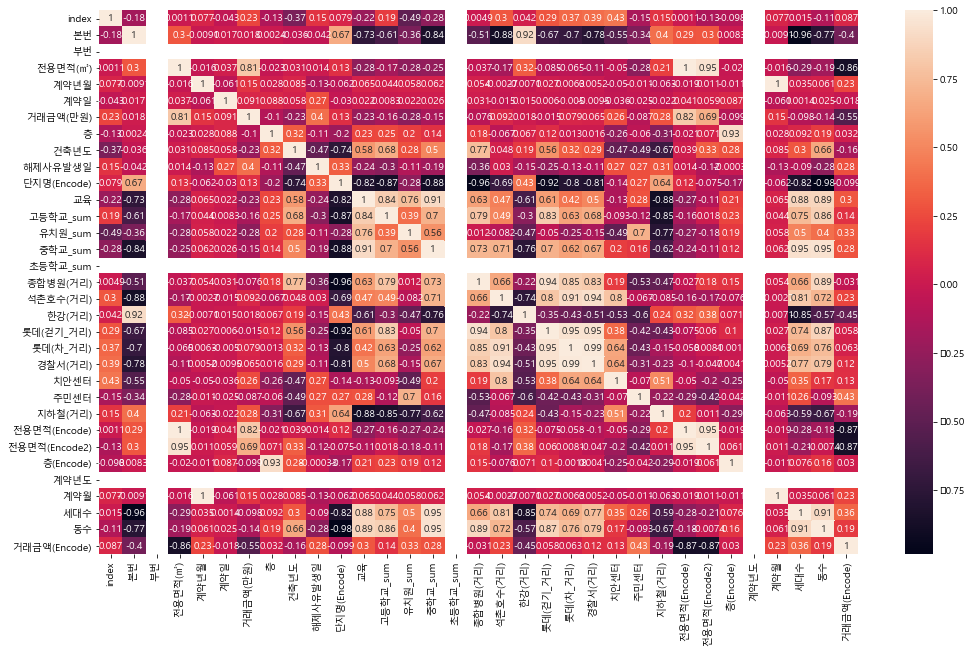

In [ ]:
plt.figure(figsize=(17,10))
sns.heatmap(train.corr(), annot=True)

<AxesSubplot:xlabel='거래금액(Encode)', ylabel='고등학교_sum'>

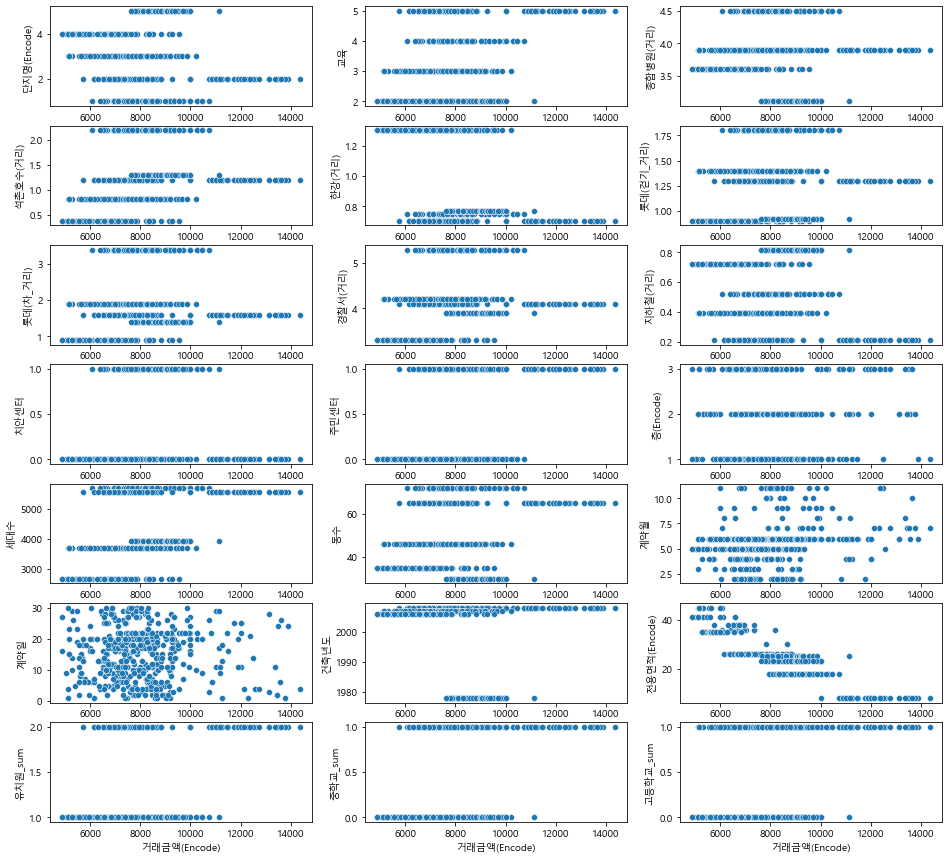

In [ ]:
figure, ax = plt.subplots(7, 3)
figure.set_size_inches(16,15)

sns.scatterplot(data=train, y='단지명(Encode)', x='거래금액(Encode)', ax=ax[0][0])
sns.scatterplot(data=train, y='교육', x='거래금액(Encode)', ax=ax[0][1])
sns.scatterplot(data=train, y='종합병원(거리)', x='거래금액(Encode)', ax=ax[0][2])

sns.scatterplot(data=train, y='석촌호수(거리)', x='거래금액(Encode)', ax=ax[1][0])
sns.scatterplot(data=train, y='한강(거리)', x='거래금액(Encode)', ax=ax[1][1])
sns.scatterplot(data=train, y='롯데(걷기_거리)', x='거래금액(Encode)', ax=ax[1][2])

sns.scatterplot(data=train, y='롯데(차_거리)', x='거래금액(Encode)', ax=ax[2][0])
sns.scatterplot(data=train, y='경찰서(거리)', x='거래금액(Encode)', ax=ax[2][1])
sns.scatterplot(data=train, y='지하철(거리)', x='거래금액(Encode)', ax=ax[2][2])

sns.scatterplot(data=train, y='치안센터', x='거래금액(Encode)', ax=ax[3][0])
sns.scatterplot(data=train, y='주민센터', x='거래금액(Encode)', ax=ax[3][1])
sns.scatterplot(data=train, y='층(Encode)', x='거래금액(Encode)', ax=ax[3][2])
             
sns.scatterplot(data=train, y='세대수', x='거래금액(Encode)', ax=ax[4][0])
sns.scatterplot(data=train, y='동수', x='거래금액(Encode)', ax=ax[4][1])
sns.scatterplot(data=train, y='계약월', x='거래금액(Encode)', ax=ax[4][2])

sns.scatterplot(data=train, y='계약일', x='거래금액(Encode)', ax=ax[5][0])
#sns.scatterplot(data=train, y='전용면적(Encode)', x='거래금액(Encode)', ax=ax[4][0])
#sns.scatterplot(data=train, y='전용면적(Encode2)', x='거래금액(Encode)', ax=ax[4][1])
sns.scatterplot(data=train, y='건축년도', x='거래금액(Encode)', ax=ax[5][1])
sns.scatterplot(data=train, y='전용면적(Encode)', x='거래금액(Encode)', ax=ax[5][2])
#sns.distplot(train['거래금액(Encode)'], ax=ax[5][2])
             
sns.scatterplot(data=train, y='유치원_sum', x='거래금액(Encode)', ax=ax[6][0])
sns.scatterplot(data=train, y='중학교_sum', x='거래금액(Encode)', ax=ax[6][1])
sns.scatterplot(data=train, y='고등학교_sum', x='거래금액(Encode)', ax=ax[6][2])

<AxesSubplot:xlabel='계약년월', ylabel='거래금액(Encode)'>

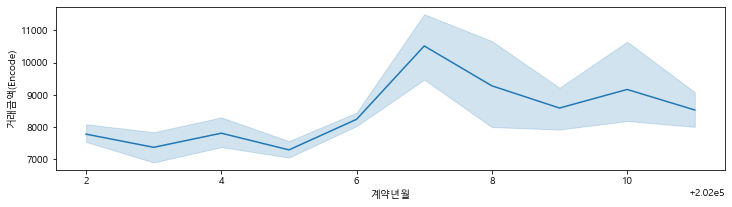

In [ ]:
plt.figure(figsize=(12,3))
sns.lineplot(data=train, x='계약년월', y='거래금액(Encode)')

In [ ]:
##### 땅지분 18㎡이상 보유시 해당 구청장의 허가가 있어야 거래 가능
##### 2년간 실거주 필수
##### 6.23부터 효력 발생

##### 자금조달계획서 제출 9월부터

#### 5. Modeling

#### 5-1) Feature selection

In [ ]:
train.columns

Index(['index', '시군구', '번지', '본번', '부번', '단지명', '전용면적(㎡)', '계약년월', '계약일',
       '거래금액(만원)', '층', '건축년도', '도로명', '해제사유발생일', '거래유형', '중개사소재지',
       '단지명(Encode)', '교육', '고등학교_sum', '유치원_sum', '중학교_sum', '초등학교_sum',
       '종합병원(거리)', '석촌호수(거리)', '한강(거리)', '롯데(걷기_거리)', '롯데(차_거리)', '경찰서(거리)',
       '치안센터', '주민센터', '지하철(거리)', '전용면적(Encode)', '전용면적(Encode2)', '층(Encode)',
       '계약년도', '계약월', '세대수', '동수', '거래금액(Encode)'],
      dtype='object')

In [ ]:
f_names = ['본번', '계약일', '세대수', '동수', 
       '건축년도', '단지명(Encode)', '교육',
       '고등학교_sum', '유치원_sum', '중학교_sum',
       '종합병원(거리)', '석촌호수(거리)', '한강(거리)', '롯데(걷기_거리)', '롯데(차_거리)', '경찰서(거리)',
       '치안센터', '주민센터', '지하철(거리)',
       '층(Encode)', '계약월']
# '전용면적(㎡)', '전용면적(Encode2)', '계약년월',  '초등학교_sum',  '계약년도', '층', '전용면적(Encode)',

t_name = '거래금액(Encode)'

In [ ]:
X_train = train[f_names]
y_train = train[t_name]

In [ ]:
X_test = test[f_names]

#### 5-2) Fitting & Prediction

#### 5-2-1) RandomForest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf_reg = RandomForestRegressor(max_depth=45, min_samples_leaf=25, min_samples_split=25,
                               n_estimators=200, random_state=54)

In [ ]:
rf_reg.fit(X_train, y_train)

RandomForestRegressor(max_depth=45, min_samples_leaf=25, min_samples_split=25,
                      n_estimators=200, random_state=54)

In [ ]:
rf_pred = rf_reg.predict(X_test)

#### 5-2-2) GradientBoost

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
gb_reg = GradientBoostingRegressor(learning_rate=0.01, max_depth=45, min_samples_leaf=25,
                                   min_samples_split=25, n_estimators=200,
                                   n_iter_no_change=15, random_state=54, subsample=0.9,
                                   verbose=1)

In [ ]:
gb_reg.fit(X_train, y_train)

      Iter       Train Loss      OOB Improve   Remaining Time 
         1     2764466.6610       18151.6505            0.48s
         2     2764173.7194       11636.5422            0.34s
         3     2823488.1231       12383.7281            0.37s
         4     2694728.7257       14630.7392            0.33s
         5     2644430.5457        9930.7093            0.34s
         6     2624495.2865       12046.3521            0.31s
         7     2508499.6502       26647.1809            0.29s
         8     2595022.1900       11151.9343            0.28s
         9     2625737.3988       16447.8008            0.27s
        10     2505024.7978       11529.1840            0.26s
        20     2480821.7353        3083.2374            0.18s
        30     2199583.1135        6689.1545            0.15s
        40     2092875.1132       10978.7997            0.13s
        50     2108273.4882        4465.8790            0.13s
        60     2018205.3556        4792.6540            0.12s
       

GradientBoostingRegressor(learning_rate=0.01, max_depth=45, min_samples_leaf=25,
                          min_samples_split=25, n_estimators=200,
                          n_iter_no_change=15, random_state=54, subsample=0.9,
                          verbose=1)

In [ ]:
gb_pred = gb_reg.predict(X_test)

gb_pred

array([ 8330.13808201,  8360.9025956 ,  8360.9025956 ,  8364.64984062,
        8250.23450026,  8499.91434796,  8375.84153836,  8281.61944244,
        8627.00394102,  8698.25161318,  8595.59637527,  9937.67758693,
       10375.66565459, 10375.66565459, 10387.89608416, 10375.66565459,
        9937.67758693,  9937.67758693,  9704.80665153, 10165.57262412,
        9538.04587364,  9538.04587364, 10167.27482173,  9230.56929385,
        9230.56929385,  9674.3021605 ,  9255.28456613,  9356.42995382,
        9618.42931958,  9775.46826731,  9829.87042263,  9859.91462992,
        9829.87042263,  9859.91462992,  9532.39953013,  9829.87042263,
        7904.86274797,  7621.14418313,  7570.46316748,  7893.85550394,
        7610.57828791,  7535.95498412,  7562.7837572 ,  7748.96440363,
        7803.05467595,  7455.22400054,  7455.22400054,  7455.22400054,
       10183.8346563 ,  9843.38472448,  9692.87629657,  9664.73860461,
        9664.73860461,  9315.62705928,  9411.62029565,  9704.03944411,
      

### 6. Evaluation / Tuning

#### 6-1) KFold

In [ ]:
pd.DataFrame(rf_reg.feature_importances_, index=f_names, columns=["f_importance"]).sort_values(by="f_importance", ascending=False)

,f_importance
계약월,0.269307
주민센터,0.152099
한강(거리),0.135666
본번,0.119315
석촌호수(거리),0.084229
세대수,0.070112
계약일,0.069315
층(Encode),0.021540
단지명(Encode),0.016003
경찰서(거리),0.011523


In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

In [ ]:
kfold = KFold(n_splits=5, shuffle=False)

In [ ]:
avg = 0

for tr_val, te_val in kfold.split(X_train, y_train):
    rf_reg.fit(X_train.iloc[tr_val], y_train.iloc[tr_val])
    pred_val = rf_reg.predict(X_train.iloc[te_val])
    
    avg += mean_squared_error(y_train.iloc[te_val], pred_val)
    print(mean_squared_error(y_train.iloc[te_val], pred_val))
    
print(f"Average = {np.sqrt(round((avg / kfold.n_splits),5))}")

# 오류의 제곱이 오류보다 커지는 특성을 보완하는 RMSE

1521234.336181017
3587155.836588996
3800840.943096395
1746336.3202101865
1588783.118058203
Average = 1564.886612771034


In [ ]:
avg = 0

for tr_val, te_val in kfold.split(X_train, y_train):
    gb_reg.fit(X_train.iloc[tr_val], y_train.iloc[tr_val])
    pred_val = gb_reg.predict(X_train.iloc[te_val])
    
    avg += mean_squared_error(y_train.iloc[te_val], pred_val)
    print(mean_squared_error(y_train.iloc[te_val], pred_val))
    
print(f"Average = {np.sqrt(round((avg / kfold.n_splits),5))}")

# 오류의 제곱이 오류보다 커지는 특성을 보완하는 RMSE

      Iter       Train Loss      OOB Improve   Remaining Time 
         1     3228462.6860       25952.4656            0.40s
         2     3336876.6652       19764.8429            0.39s
         3     3197333.7917       23269.2537            0.33s
         4     2964020.3386       25879.1652            0.29s
         5     3171493.1504       21756.6389            0.27s
         6     3111713.8022       20191.3534            0.26s
         7     3121190.2230       18947.4207            0.25s
         8     3145219.1666       15123.6050            0.24s
         9     3102139.9347       18042.3080            0.25s
        10     3030459.0302       15453.5477            0.25s
        20     2838802.7064       13697.5990            0.20s
        30     2598561.8717       15106.3693            0.20s
        40     2628201.4981        8478.6132            0.18s
        50     2484425.0846        9658.9774            0.16s
        60     2447326.5546         425.8078            0.15s
       

#### 6-2) Hold-out validation

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error

In [ ]:
X_train_eval, X_test_eval, y_train_eval, y_test_eval = train_test_split(X_train, y_train, 
                                                                        shuffle=False, test_size=0.1,
                                                                        random_state=54)

In [ ]:
rf_reg.fit(X_train_eval, y_train_eval)

RandomForestRegressor(max_depth=45, min_samples_leaf=25, min_samples_split=25,
                      n_estimators=200, random_state=54)

In [ ]:
rf_pred_eval = rf_reg.predict(X_test_eval)

In [ ]:
mean_absolute_error(rf_pred_eval, y_test_eval)

298.79092601677814

In [ ]:
gb_reg.fit(X_train_eval, y_train_eval)

      Iter       Train Loss      OOB Improve   Remaining Time 
         1     3024921.3983       10447.6849            0.20s
         2     2842070.0344       21270.9646            0.30s
         3     2705719.9556       18031.6714            0.26s
         4     2800313.3930       16618.5280            0.24s
         5     2890474.7684        6132.8712            0.27s
         6     2693973.4312       16154.3123            0.26s
         7     2667756.0852       17679.7957            0.25s
         8     2743712.3098       14996.6755            0.24s
         9     2715819.9863       16069.0295            0.21s
        10     2691598.5582       16170.7803            0.21s
        20     2590575.6117        7284.8360            0.17s
        30     2374335.8713        7134.5017            0.14s
        40     2290661.2856        9939.8413            0.13s
        50     2191384.0744        4449.4481            0.12s
        60     2020808.0159        4933.6691            0.10s
       

GradientBoostingRegressor(learning_rate=0.01, max_depth=45, min_samples_leaf=25,
                          min_samples_split=25, n_estimators=200,
                          n_iter_no_change=15, random_state=54, subsample=0.9,
                          verbose=1)

In [ ]:
gb_pred_eval = gb_reg.predict(X_test_eval)

In [ ]:
mean_absolute_error(gb_pred_eval, y_test_eval)

478.0856859586741

In [ ]:
train['거래금액(Encode)'].describe()

count      520.000000
mean      8091.346752
std       1646.332844
min       4865.853659
25%       7112.500000
50%       7853.617391
75%       8827.898551
max      14375.000000
Name: 거래금액(Encode), dtype: float64

In [ ]:
298/8091*100
# 이러면 약 4%의 오차가 나는건가요?

3.683104684217031

#### 6-3) Tuning

#### 6-3-1) GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameters = {
    "max_depth" : [45,50,60,80],
    "n_estimators" : [180,200,230,250],
    "min_samples_split" : [25,30,35],
    "min_samples_leaf" : [25,30,35],
}

grid_rf = GridSearchCV(rf_reg, param_grid=parameters, cv=5, scoring="neg_mean_absolute_error", verbose=1, n_jobs=-1)

In [ ]:
grid_rf.fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5,
             estimator=RandomForestRegressor(max_depth=45, min_samples_leaf=25,
                                             min_samples_split=25,
                                             n_estimators=200,
                                             random_state=54),
             n_jobs=-1,
             param_grid={'max_depth': [45, 50, 60, 80],
                         'min_samples_leaf': [25, 30, 35],
                         'min_samples_split': [25, 30, 35],
                         'n_estimators': [180, 200, 230, 250]},
             scoring='neg_mean_absolute_error', verbose=1)

In [ ]:
print(grid_rf.best_score_)
print(grid_rf.best_params_)
print(grid_rf.best_estimator_)

-1305.953368672174
{'max_depth': 45, 'min_samples_leaf': 25, 'min_samples_split': 25, 'n_estimators': 200}
RandomForestRegressor(max_depth=45, min_samples_leaf=25, min_samples_split=25,
                      n_estimators=200, random_state=54)


In [ ]:
parameters = {
    "max_depth" : [45,50,60,80],
    "n_estimators" : [180,200,230,250],
    "min_samples_split" : [25,30,35],
    "min_samples_leaf" : [25,30,35],
}

grid_gb = GridSearchCV(gb_reg, param_grid=parameters, cv=5, scoring="neg_mean_absolute_error", verbose=1, n_jobs=-1)

In [ ]:
grid_gb.fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
      Iter       Train Loss      OOB Improve   Remaining Time 
         1     2764466.6610       18151.6505            0.40s
         2     2764173.7194       11636.5422            0.39s
         3     2823488.1231       12383.7281            0.39s
         4     2694728.7257       14630.7392            0.34s
         5     2644430.5457        9930.7093            0.35s
         6     2624495.2865       12046.3521            0.32s
         7     2508499.6502       26647.1809            0.33s
         8     2595022.1900       11151.9343            0.34s
         9     2625737.3988       16447.8008            0.34s
        10     2505024.7978       11529.1840            0.34s
        20     2480821.7353        3083.2374            0.28s
        30     2199583.1135        6689.1545            0.25s
        40     2092875.1132       10978.7997            0.23s
        50     2108273.4882        4465.8790            0.21s
      

GridSearchCV(cv=5,
             estimator=GradientBoostingRegressor(learning_rate=0.01,
                                                 max_depth=45,
                                                 min_samples_leaf=25,
                                                 min_samples_split=25,
                                                 n_estimators=200,
                                                 n_iter_no_change=15,
                                                 random_state=54, subsample=0.9,
                                                 verbose=1),
             n_jobs=-1,
             param_grid={'max_depth': [45, 50, 60, 80],
                         'min_samples_leaf': [25, 30, 35],
                         'min_samples_split': [25, 30, 35],
                         'n_estimators': [180, 200, 230, 250]},
             scoring='neg_mean_absolute_error', verbose=1)

In [ ]:
print(grid_gb.best_score_)
print(grid_gb.best_params_)
print(grid_gb.best_estimator_)

-1225.4287812552861
{'max_depth': 45, 'min_samples_leaf': 25, 'min_samples_split': 25, 'n_estimators': 200}
GradientBoostingRegressor(learning_rate=0.01, max_depth=45, min_samples_leaf=25,
                          min_samples_split=25, n_estimators=200,
                          n_iter_no_change=15, random_state=54, subsample=0.9,
                          verbose=1)
